# Palmer Penguins Dataset Extended

Информация о биологических показателях различных видов [пингвинов](https://www.kaggle.com/datasets/samybaladram/palmers-penguin-dataset-extended)

## Краткое описание датасета

### (a)

Набор данных, собранный на архипелаге Палмера вблизи Антарктиды, содержит информацию о трех видах пингвинов - Адели, Генту и Чинстрап - и охватывает такие важные биологические показатели, как размеры клюва и масса тела.

### (b)

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_frame = pd.read_csv("archive/palmerpenguins_extended.csv")
data_frame.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
diet                  object
life_stage            object
health_metrics        object
year                   int64
dtype: object

In [8]:
data_frame

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
0,Adelie,Biscoe,53.4,17.8,219.0,5687.0,female,fish,adult,overweight,2021
1,Adelie,Biscoe,49.3,18.1,245.0,6811.0,female,fish,adult,overweight,2021
2,Adelie,Biscoe,55.7,16.6,226.0,5388.0,female,fish,adult,overweight,2021
3,Adelie,Biscoe,38.0,15.6,221.0,6262.0,female,fish,adult,overweight,2021
4,Adelie,Biscoe,60.7,17.9,177.0,4811.0,female,fish,juvenile,overweight,2021
...,...,...,...,...,...,...,...,...,...,...,...
3425,Gentoo,Biscoe,44.0,20.4,252.0,6447.0,male,squid,adult,healthy,2025
3426,Gentoo,Biscoe,54.5,25.2,245.0,6872.0,male,squid,adult,healthy,2025
3427,Gentoo,Biscoe,51.4,20.4,258.0,7409.0,male,squid,adult,overweight,2025
3428,Gentoo,Biscoe,55.9,20.5,247.0,6491.0,male,squid,adult,healthy,2025


Для упрощения задачи выберем следующие атрибуты:
- species: Виды пингвинов
- island: Остров, на котором был найден пингвин
- bill_length_mm: Длина клюва в миллиметрах
- bill_depth_mm: ширина клюва в миллиметрах
- flipper_length_mm: Длина плавника в миллиметрах
- body_mass_g: Масса тела в граммах
- sex: Пол пингвина
- year: Год сбора данных

In [76]:
cols = ['year', 'species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']
df = data_frame[cols].sort_values(by='year', ascending=True)[:100]
df

,year,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,2021,Adelie,Biscoe,53.4,17.8,219.0,5687.0,female
242,2021,Gentoo,Biscoe,55.9,19.0,260.0,6275.0,female
241,2021,Gentoo,Biscoe,47.1,19.4,220.0,4919.0,female
240,2021,Gentoo,Biscoe,55.4,18.0,238.0,7492.0,female
239,2021,Gentoo,Biscoe,71.9,19.7,243.0,6882.0,female
...,...,...,...,...,...,...,...,...
326,2021,Gentoo,Biscoe,32.4,15.6,188.0,3277.0,female
325,2021,Gentoo,Biscoe,34.4,18.5,178.0,4076.0,female
324,2021,Gentoo,Biscoe,26.6,18.0,190.0,3621.0,female
332,2021,Gentoo,Biscoe,28.9,18.6,194.0,3813.0,female


## Анализ атрибутов датасета

### (a) Среднее значение, ско

In [77]:
mean_values = df.drop(['year', 'species', 'island', 'sex'], axis=1).mean()
print("Средние значения:")
print(mean_values)

std_values = df.drop(['year', 'species', 'island', 'sex'], axis=1).std()
print("\nСтандартное отклонение (ско):")
print(std_values)

Средние значения:
bill_length_mm         43.891
bill_depth_mm          18.693
flipper_length_mm     210.190
body_mass_g          5058.570
dtype: float64

Стандартное отклонение (ско):
bill_length_mm         14.516073
bill_depth_mm           3.053703
flipper_length_mm      30.430811
body_mass_g          1474.173758
dtype: float64


### (b) Построить гистограмму распределения значений, определить есть ли выбросы

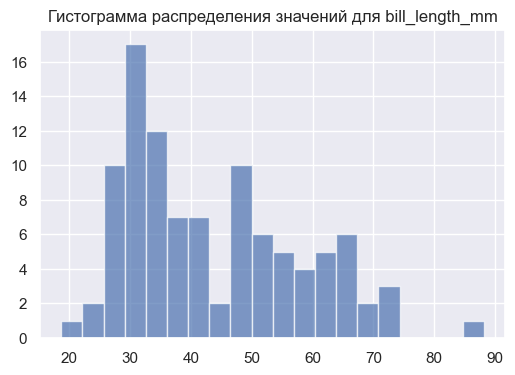

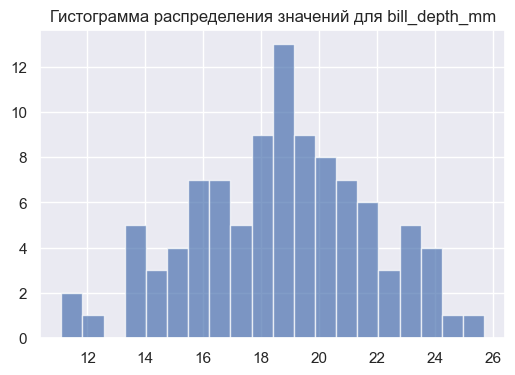

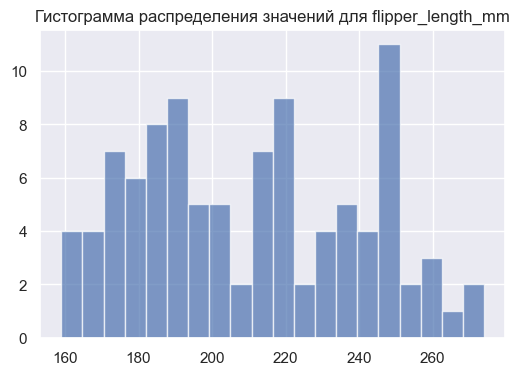

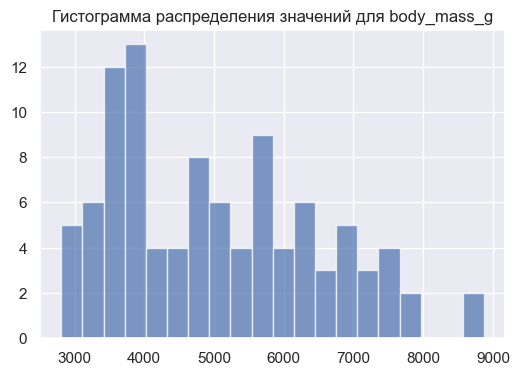

Количество выбросов в bill_length_mm : 0
Количество выбросов в bill_depth_mm : 0
Количество выбросов в flipper_length_mm : 0
Количество выбросов в body_mass_g : 0


In [78]:
for column in df.drop(['year', 'species', 'island', 'sex'], axis=1).columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df[column], bins=20, alpha=0.7)
    plt.title(f'Гистограмма распределения значений для {column}')
    plt.show()

for column in df.drop(['year', 'species', 'island', 'sex'], axis=1).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Количество выбросов в {column} : {str(len(outliers))}")

### (c) Определим наличие пропущенных значений для каждого атрибута

In [70]:
for column in df.drop(['year', 'species', 'island', 'sex'], axis=1).columns:
    missing = df[column].isna().sum()
    print(f"Пропущенных значений в {column} : {missing}")

Пропущенных значений в bill_length_mm : 0
Пропущенных значений в bill_depth_mm : 0
Пропущенных значений в flipper_length_mm : 0
Пропущенных значений в body_mass_g : 0


### (d) Варианты обработки пропущенных значений

- Замена средним значением или медианой

```python
df_n = df.fillna(df.mean())
```

- Интерполяция

```python
df_inter = df.interpolate()
```

-  Удаление пропущенных значений

```python
df = df.dropna()
```

## Определение корреляции между параметрами

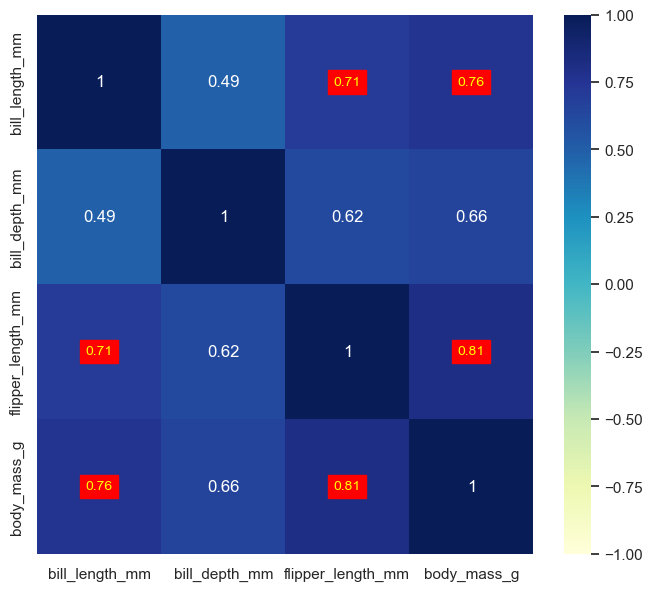

In [79]:
corr = df.drop(['year', 'species', 'island', 'sex'], axis=1).corr()

plt.figure(figsize=(8, 7))
sns.heatmap(corr, annot=True, cmap="YlGnBu", vmin=-1, vmax=1)


threshold = 0.7

for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        if i != j and (corr.iloc[i, j] >= threshold or corr.iloc[i, j] <= -threshold):
            plt.text(i+0.5, j+0.5, f"{corr.iloc[i, j]:.2f}", ha="center", va="center", fontsize=10, color="yellow", backgroundcolor="red")


plt.show()

### (a)

### Высококоррелированные атрибуты

Мы построили матрицу, в которой все ее элементы представляют коэффициент корреляции Пирсона между соответствующими парами атрибутов. Коэффициент корреляции Пирсона может принимать значения от -1 до 1 и указывает на степень и направление линейной корреляции:
- 1: Положительная линейная корреляция
- 0: Отсутствие линейной корреляции
- -1: Отрицательная линейная корреляция
Чем сильнее отклонение от 0, тем сильнее корреляция между парами. Для определения высококоррелированых атрибутов задали порог в 0,7 и -0,7 

### Характер корреляции

Значения ```flipper_length_m``` и ```body_mass_g``` имеют положительную корреляцию, отсюла можно сделать вывод, что два значения связаны и при увеличении одной переменной, другая переменная также увеличивается, то есть вес массы тела пингвина и длина его плавника зависят друг от друга. 

Однако, корреляция не всегда означает причинно-следственную связь между атрибутами, и может быть полезно провести более глубокий анализ для интерпретации результатов.

### (b) Атрибуты, не имеющие корреляцию

Атрибут с корреляцией 0 в данном примере не оказалось, но можно заметить, что наименьшей корреляцией обладают переменные ```bill_depth_mm``` и bill_length_mm

### (c) График рассеивания

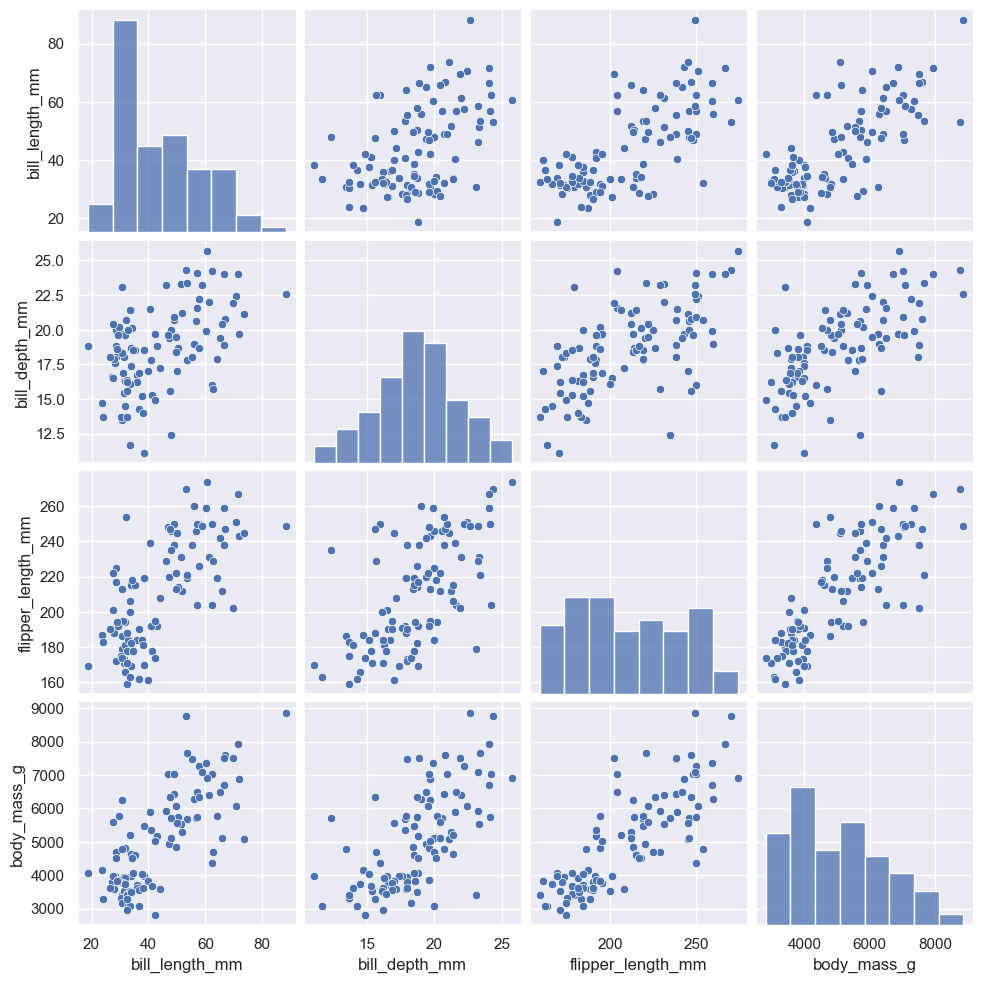

In [80]:
sns.set(style="darkgrid")
sns.pairplot(df.drop(['year', 'species', 'island', 'sex'], axis=1))
plt.show()

### (d) Анализ полученных результатов 

Параметры ```flipper_length_mm``` и ```body_mass_g имеют``` структуру рассеивания, похожую на линейную. Отсюда можно сделать несколько выводов:
- с увеличением одной переменной, другая переменная также увеличивается, в нашем случаее при увеличении массы тела пингвина длиа его плавников также растет
- с увеличением одной переменной, другая переменная уменьшается, то есть когда длина плавника увеличивается, масса тела будет уменьшаться


Параметры ```flipper_length_mm``` и ```bill_length_mm``` образуют структуру похожую на букву ```L```. Это может означать, что эти две подгруппы имеют различные значения, например, длина клюва больше его ширины